In [74]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
ratings = pd.read_csv("./ml-latest-small/ml-latest-small/ratings.csv")
ratings

userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]

In [76]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [77]:
print("there is ",ratings["userId"].nunique()," unique user")
print("there is ",ratings["movieId"].nunique()," unique movie")
print("there is ",ratings["rating"].nunique()," unique rating")
print('The unique ratings are', sorted(ratings["rating"].unique()))


there is  610  unique user
there is  9724  unique movie
there is  10  unique rating
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [78]:
movies = pd.read_csv('./ml-latest-small/ml-latest-small//movies.csv')
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [79]:
df = pd.merge(ratings,movies,on='movieId',how='inner')
df

userId  movieId  rating   timestamp                             title  \
0            1        1     4.0   964982703                  Toy Story (1995)   
1            5        1     4.0   847434962                  Toy Story (1995)   
2            7        1     4.5  1106635946                  Toy Story (1995)   
3           15        1     2.5  1510577970                  Toy Story (1995)   
4           17        1     4.5  1305696483                  Toy Story (1995)   
...        ...      ...     ...         ...                               ...   
100831     610   160341     2.5  1479545749                  Bloodmoon (1997)   
100832     610   160527     4.5  1479544998  Sympathy for the Underdog (1971)   
100833     610   160836     3.0  1493844794                     Hazard (2005)   
100834     610   163937     3.5  1493848789                Blair Witch (2016)   
100835     610   163981     3.5  1493850155                         31 (2016)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1       Adventure|Animation|Children|Comedy|Fantasy  
2       Adventure|Animation|Children|Comedy|Fantasy  
3       Adventure|Animation|Children|Comedy|Fantasy  
4       Adventure|Animation|Children|Comedy|Fantasy  
...                                             ...  
100831                              Action|Thriller  
100832                           Action|Crime|Drama  
100833                        Action|Drama|Thriller  
100834                              Horror|Thriller  
100835                                       Horror  

[100836 rows x 6 columns]

In [80]:
df.size

605016

In [81]:
# group by title , and make aggregation
agg_ratings = df.groupby("title").agg(
    mean_rating = ('rating','mean'),
    number_of_ratings = ('rating','count')
).reset_index()

In [82]:
agg_ratings

title  mean_rating  \
0                                    '71 (2014)     4.000000   
1       'Hellboy': The Seeds of Creation (2004)     4.000000   
2                        'Round Midnight (1986)     3.500000   
3                           'Salem's Lot (2004)     5.000000   
4                     'Til There Was You (1997)     4.000000   
...                                         ...          ...   
9714                            eXistenZ (1999)     3.863636   
9715                                 xXx (2002)     2.770833   
9716             xXx: State of the Union (2005)     2.000000   
9717                      ¡Three Amigos! (1986)     3.134615   
9718  À nous la liberté (Freedom for Us) (1931)     1.000000   

      number_of_ratings  
0                     1  
1                     1  
2                     2  
3                     1  
4                     2  
...                 ...  
9714                 22  
9715                 24  
9716                  5  
9717                 26  
9718                  1  

[9719 rows x 3 columns]

In [83]:
# now we gonna filter so we have just movie with over 100 ratings
agg_ratings_100 = agg_ratings[agg_ratings['number_of_ratings']>100]
agg_ratings_100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 74 to 9615
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              134 non-null    object 
 1   mean_rating        134 non-null    float64
 2   number_of_ratings  134 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [84]:
# check for popular movies
agg_ratings_100.sort_values(by='number_of_ratings',ascending=False).head()

title  mean_rating  number_of_ratings
3158               Forrest Gump (1994)     4.164134                329
7593  Shawshank Redemption, The (1994)     4.429022                317
6865               Pulp Fiction (1994)     4.197068                307
7680  Silence of the Lambs, The (1991)     4.161290                279
5512                Matrix, The (1999)     4.192446                278

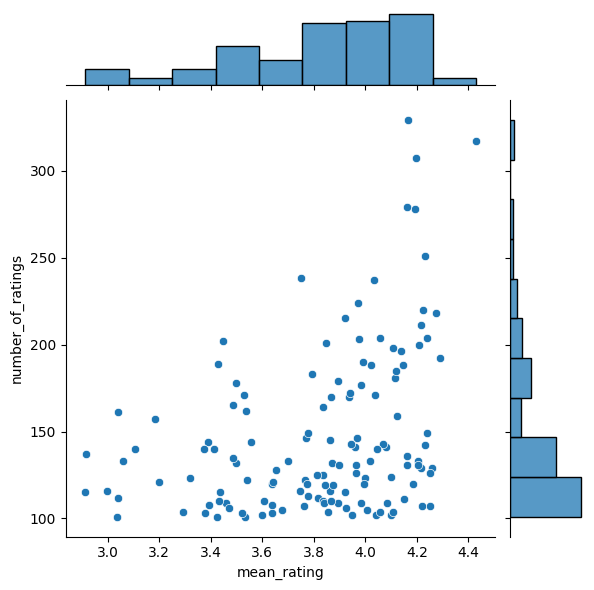

In [85]:
sns.jointplot(x='mean_rating',y='number_of_ratings',data=agg_ratings_100)

In [86]:
df_GT100 = pd.merge(df , agg_ratings_100[['title']],on='title',how='inner')
df_GT100.head()

userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy

In [87]:
# Number of users
print('The ratings dataset has', df_GT100['userId'].nunique(), 'unique users')
# Number of movies
print('The ratings dataset has', df_GT100['movieId'].nunique(), 'unique movies')
# Number of ratings
print('The ratings dataset has', df_GT100['rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(df_GT100['rating'].unique()))

The ratings dataset has 597 unique users
The ratings dataset has 134 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


## create a user-movie matrix

In [88]:
matrix = df_GT100.pivot_table(index='userId',columns='title',values='rating')
matrix.tail()

title   2001: A Space Odyssey (1968)  Ace Ventura: Pet Detective (1994)  \
userId                                                                    
606                              5.0                                NaN   
607                              NaN                                NaN   
608                              3.0                                3.5   
609                              NaN                                NaN   
610                              4.5                                3.0   

title   Aladdin (1992)  Alien (1979)  Aliens (1986)  \
userId                                                
606                NaN           4.0            3.5   
607                NaN           3.0            NaN   
608                3.0           4.0            4.5   
609                NaN           NaN            NaN   
610                NaN           4.5            5.0   

title   Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  \
userId                                                         
606                                                   4.5      
607                                                   NaN      
608                                                   NaN      
609                                                   NaN      
610                                                   4.0      

title   American Beauty (1999)  American History X (1998)  \
userId                                                      
606                        4.5                        4.0   
607                        3.0                        NaN   
608                        5.0                        4.0   
609                        NaN                        NaN   
610                        3.5                        NaN   

title   American Pie (1999)  Apocalypse Now (1979)  ...  True Lies (1994)  \
userId                                              ...                     
606                     1.0                    4.5  ...               NaN   
607                     NaN                    NaN  ...               4.0   
608                     2.5                    3.0  ...               3.0   
609                     NaN                    NaN  ...               NaN   
610                     NaN                    5.0  ...               5.0   

title   Truman Show, The (1998)  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  \
userId                                                                       
606                         4.5                                        4.0   
607                         NaN                                        NaN   
608                         4.5                                        3.5   
609                         NaN                                        NaN   
610                         5.0                                        4.5   

title   Twister (1996)  Up (2009)  Usual Suspects, The (1995)  WALL·E (2008)  \
userId                                                                         
606                NaN        NaN                         4.5            4.0   
607                5.0        NaN                         NaN            NaN   
608                3.0        NaN                         4.5            NaN   
609                NaN        NaN                         NaN            NaN   
610                NaN        3.5                         4.0            4.5   

title   Waterworld (1995)  Willy Wonka & the Chocolate Factory (1971)  \
userId                                                                  
606                   NaN                                         NaN   
607                   3.0                                         NaN   
608                   3.0                                         3.5   
609                   3.0                                         NaN   
610                   NaN                                         NaN   

title   X-Men (2000)  
userId                
606  

In [89]:
matrix_norm = matrix.subtract(matrix.mean(axis=1) , axis='rows')
matrix_norm.head()

title   2001: A Space Odyssey (1968)  Ace Ventura: Pet Detective (1994)  \
userId                                                                    
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   
5                                NaN                          -0.461538   

title   Aladdin (1992)  Alien (1979)  Aliens (1986)  \
userId                                                
1                  NaN     -0.392857            NaN   
2                  NaN           NaN            NaN   
3                  NaN           NaN            NaN   
4             0.617647           NaN            NaN   
5             0.538462           NaN            NaN   

title   Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  \
userId                                                         
1                                                     NaN      
2                                                     NaN      
3                                                     NaN      
4                                                     NaN      
5                                                     NaN      

title   American Beauty (1999)  American History X (1998)  \
userId                                                      
1                     0.607143                   0.607143   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                     1.617647                        NaN   
5                          NaN                        NaN   

title   American Pie (1999)  Apocalypse Now (1979)  ...  True Lies (1994)  \
userId                                              ...                     
1                       NaN              -0.392857  ...               NaN   
2                       NaN                    NaN  ...               NaN   
3                       NaN                    NaN  ...               NaN   
4                       NaN                    NaN  ...               NaN   
5                       NaN                    NaN  ...         -1.461538   

title   Truman Show, The (1998)  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  \
userId                                                                       
1                           NaN                                        NaN   
2                           NaN                                        NaN   
3                           NaN                                        NaN   
4                           NaN                                  -1.382353   
5                           NaN                                        NaN   

title   Twister (1996)  Up (2009)  Usual Suspects, The (1995)  WALL·E (2008)  \
userId                                                                         
1            -1.392857        NaN                    0.607143            NaN   
2                  NaN        NaN                         NaN            NaN   
3                  NaN        NaN                         NaN            NaN   
4                  NaN        NaN                         NaN            NaN   
5                  NaN        NaN                    0.538462            NaN   

title   Waterworld (1995)  Willy Wonka & the Chocolate Factory (1971)  \
userId                                                                  
1                     NaN                                    0.607143   
2                     NaN                                         NaN   
3                     NaN                                         NaN   
4                     NaN                                    0.617647   
5                     NaN                                         NaN   

title   X-Men (2000)  
userId                
1    

In [90]:
user_similarity_Pearson = matrix_norm.T.corr()
user_similarity_Pearson.head()

userId       1    2    3         4         5         6         7         8    \
userId                                                                         
1       1.000000  NaN  NaN  0.391797  0.180151 -0.439941 -0.029894  0.464277   
2            NaN  1.0  NaN       NaN       NaN       NaN       NaN       NaN   
3            NaN  NaN  NaN       NaN       NaN       NaN       NaN       NaN   
4       0.391797  NaN  NaN  1.000000 -0.394823  0.421927  0.704669  0.055442   
5       0.180151  NaN  NaN -0.394823  1.000000 -0.006888  0.328889  0.030168   

userId  9         10   ...       601       602       603       604       605  \
userId                 ...                                                     
1       1.0 -0.037987  ...  0.091574  0.254514  0.101482 -0.500000  0.780020   
2       NaN  1.000000  ... -0.583333       NaN -1.000000       NaN       NaN   
3       NaN       NaN  ...       NaN       NaN       NaN       NaN       NaN   
4       NaN  0.360399  ... -0.239325  0.562500  0.162301 -0.158114  0.905134   
5       NaN -0.777714  ...  0.000000  0.231642  0.131108  0.068621 -0.245026   

userId       606       607       608       609       610  
userId                                                    
1       0.303854 -0.012077  0.242309 -0.175412  0.071553  
2       0.583333       NaN -0.229416       NaN  0.765641  
3            NaN       NaN       NaN       NaN       NaN  
4       0.021898 -0.020659 -0.286872       NaN -0.050868  
5       0.377341  0.228218  0.263139  0.384111  0.040582  

[5 rows x 597 columns]

## using cosine_similarity

In [92]:
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        ,  0.        ,  0.        , ...,  0.14893867,
        -0.06003146,  0.04528224],
       [ 0.        ,  1.        ,  0.        , ..., -0.04485403,
        -0.25197632,  0.18886414],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.14893867, -0.04485403,  0.        , ...,  1.        ,
         0.14734568,  0.07931015],
       [-0.06003146, -0.25197632,  0.        , ...,  0.14734568,
         1.        , -0.14276787],
       [ 0.04528224,  0.18886414,  0.        , ...,  0.07931015,
        -0.14276787,  1.        ]])

In [94]:
user_picked_id = 1
user_similarity_Pearson.drop(user_picked_id , inplace=True)

In [95]:
user_similarity_Pearson

userId       1         2    3         4         5         6         7    \
userId                                                                    
2            NaN  1.000000  NaN       NaN       NaN       NaN       NaN   
3            NaN       NaN  NaN       NaN       NaN       NaN       NaN   
4       0.391797       NaN  NaN  1.000000 -0.394823  0.421927  0.704669   
5       0.180151       NaN  NaN -0.394823  1.000000 -0.006888  0.328889   
6      -0.439941       NaN  NaN  0.421927 -0.006888  1.000000  0.000000   
...          ...       ...  ...       ...       ...       ...       ...   
606     0.303854  0.583333  NaN  0.021898  0.377341 -0.468008  0.154338   
607    -0.012077       NaN  NaN -0.020659  0.228218  0.541386  0.374808   
608     0.242309 -0.229416  NaN -0.286872  0.263139 -0.337129  0.058785   
609    -0.175412       NaN  NaN       NaN  0.384111  0.158255  0.420288   
610     0.071553  0.765641  NaN -0.050868  0.040582 -0.030567 -0.043057   

userId       8         9         10   ...       601       602       603  \
userId                                ...                                 
2            NaN       NaN  1.000000  ... -0.583333       NaN -1.000000   
3            NaN       NaN       NaN  ...       NaN       NaN       NaN   
4       0.055442       NaN  0.360399  ... -0.239325  0.562500  0.162301   
5       0.030168       NaN -0.777714  ...  0.000000  0.231642  0.131108   
6      -0.127385       NaN  0.957427  ... -0.292770 -0.030599 -0.123983   
...          ...       ...       ...  ...       ...       ...       ...   
606     0.309634 -0.262613 -0.584677  ...  0.411419  0.211316  0.304117   
607     0.281876       NaN -1.000000  ...  0.640257  0.300075  0.049099   
608     0.362413  0.073324 -0.544342  ...  0.471812  0.366453  0.308547   
609     0.104828       NaN       NaN  ...  1.000000  0.167095  0.461880   
610     0.167931  1.000000 -0.246110  ...  0.062471  0.147456  0.263633   

userId       604       605       606       607       608       609       610  
userId                                                                        
2            NaN       NaN  0.583333       NaN -0.229416       NaN  0.765641  
3            NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4      -0.158114  0.905134  0.021898 -0.020659 -0.286872       NaN -0.050868  
5       0.068621 -0.245026  0.377341  0.228218  0.263139  0.384111  0.040582  
6      -0.176327  0.063861 -0.468008  0.541386 -0.337129  0.158255 -0.030567  
...          ...       ...       ...       ...       ...       ...       ...  
606     0.600640  0.129249  1.000000  0.066328  0.410455  0.738371  0.190550  
607    -0.034091 -0.027678  0.066328  1.000000  0.037195  0.190117  0.013792  
608     0.226134  0.059129  0.410455  0.037195  1.000000  0.503937  0.103155  
609     0.800327 -0.550000  0.738371  0.190117  0.503937  1.000000 -0.521773  
610     0.433013  0.212988  0.190550  0.013792  0.103155 -0.521773  1.000000  

[596 rows x 597 columns]

In [96]:
user_similarity_Threshold = 0.3
number_user_to_select = 10
similar_users = user_similarity_Pearson[user_similarity_Pearson[user_picked_id]>user_similarity_Threshold][user_picked_id].sort_values(ascending=False)[:number_user_to_select]
print(f'The similar users for user {user_picked_id} are', similar_users)

The similar users for user 1 are userId
108    1.000000
9      1.000000
550    1.000000
598    1.000000
502    1.000000
401    0.942809
511    0.925820
366    0.872872
154    0.866025
595    0.866025
Name: 1, dtype: float64
